In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import nltk
import re
import vaderSentiment
from langdetect import detect
import pycountry

In [2]:
df = pd.read_csv('final_twitter_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,content_trans,translated_english_content
0,0,https://twitter.com/Teddymonster161/status/155...,2022-07-29 21:45:54+00:00,@kuechentyrann Deine Eier haben guten nutriscore.,@kuechentyrann Deine Eier haben guten nutriscore.,1553134748435881984,"{'username': 'Teddymonster161', 'id': 13196167...",1,0,1,...,NaN,1.553133e+18,"{'username': 'kuechentyrann', 'id': 1490347823...","[{'username': 'kuechentyrann', 'id': 149034782...",NaN,NaN,NaN,NaN,@kuechentyrann Deine Eier haben guten nutriscore.,@Kuechentyrann Your eggs have good nutriscore.
1,1,https://twitter.com/kuechentyrann/status/15531...,2022-07-29 21:40:37+00:00,@Teddymonster10 Die haben aber einen guten Nut...,@Teddymonster10 Die haben aber einen guten Nut...,1553133420754210822,"{'username': 'kuechentyrann', 'id': 1490347823...",1,0,1,...,NaN,1.550938e+18,"{'username': 'Teddymonster161', 'id': 13196167...",NaN,NaN,NaN,NaN,NaN,@Teddymonster10 Die haben aber einen guten Nut...,@Teddymonster10 they have a good nutriscore
2,2,https://twitter.com/Annatsi/status/15531227870...,2022-07-29 20:58:22+00:00,@verrechts @IvanVandeCloot Die ecoscore en nu...,@verrechts @IvanVandeCloot Die ecoscore en nu...,1553122787073695745,"{'username': 'Annatsi', 'id': 290145437, 'disp...",0,0,1,...,NaN,1.552937e+18,"{'username': 'verrechts', 'id': 87525579247523...","[{'username': 'verrechts', 'id': 8752557924752...",NaN,NaN,NaN,NaN,@verrechts @IvanVandeCloot Die ecoscore en nu...,@Vrechts @IVanVanDecloot that Ecoscore and Nut...
3,3,https://twitter.com/Albero1000/status/15531218...,2022-07-29 20:54:41+00:00,"@matteosalvinimi Quindi, gli uffici gli avevan...","@matteosalvinimi Quindi, gli uffici gli avevan...",1553121857808863237,"{'username': 'Albero1000', 'id': 1546984488927...",0,0,0,...,NaN,1.552590e+18,"{'username': 'matteosalvinimi', 'id': 27083936...","[{'username': 'matteosalvinimi', 'id': 2708393...",NaN,NaN,NaN,NaN,"@matteosalvinimi Quindi, gli uffici gli avevan...","@matteosalvinimi then, the offices had prepare..."
4,4,https://twitter.com/Quentin_Schlt/status/15531...,2022-07-29 20:33:46+00:00,"Nan mais attendez là, ils ont mis le nutriscor...","Nan mais attendez là, ils ont mis le nutriscor...",1553116593885945858,"{'username': 'Quentin_Schlt', 'id': 1351868474...",2,1,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Nan mais attendez là, ils ont mis le nutriscor...","No, but wait there, they put the Nutriscore on..."


In [4]:
df.columns

Index(['Unnamed: 0', 'url', 'date', 'content', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel',
       'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates',
       'place', 'hashtags', 'cashtags', 'content_trans',
       'translated_english_content'],
      dtype='object')

In [5]:
# removing unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

<AxesSubplot:title={'center':'likes of contents'}>

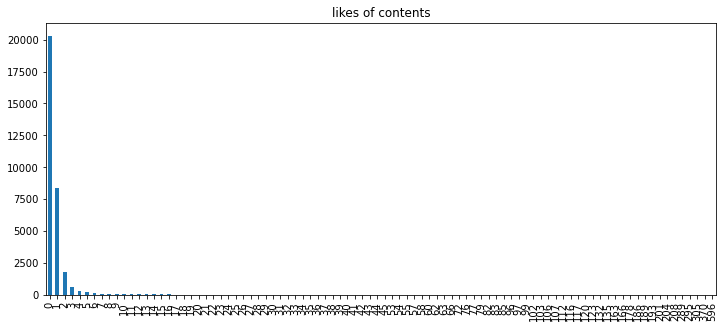

In [6]:
df['replyCount'].value_counts().sort_index().plot(kind='bar', title='likes of contents', figsize=(12,5))

most of the contents got 1 or 2 likes mostly

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [8]:
res = {}
for i, row in df.iterrows():
    text = row['translated_english_content']
    
    #user = row['user']['username']
    res[text] = sa.polarity_scores(text)
    
    

In [9]:
vad = pd.DataFrame(res).T

In [10]:
vad.head()

,neg,neu,pos,compound
@Kuechentyrann Your eggs have good nutriscore.,0.00,0.633,0.367,0.4404
@Teddymonster10 they have a good nutriscore,0.00,0.580,0.420,0.4404
@Vrechts @IVanVanDecloot that Ecoscore and Nutriscore that is all farmed -frog.,0.00,1.000,0.000,0.0000
"@matteosalvinimi then, the offices had prepared the dossier on Pnnr and nourish, but he, superficial as he is, did not read it, he did not study him, he is never learned something. He prefers to speak in the arm by repeating the same things, the same lists, the same jokes.",0.00,0.924,0.076,0.4497
"No, but wait there, they put the Nutriscore on bottles of water? ☠️☠️ https://t.co/eq5bcer680",0.11,0.890,0.000,-0.1531


In [11]:
vad = vad.reset_index().rename(columns={'index': 'translated_english_content'})

In [12]:
vad.shape

(28427, 5)

<b>DATA CLEANING</b>

In [13]:
# Define a function to clean the text

def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
vad['Cleaned_Content'] = vad['translated_english_content'].apply(clean)
vad.head()

,translated_english_content,neg,neu,pos,compound,Cleaned_Content
0,@Kuechentyrann Your eggs have good nutriscore.,0.00,0.633,0.367,0.4404,Kuechentyrann Your eggs have good nutriscore
1,@Teddymonster10 they have a good nutriscore,0.00,0.580,0.420,0.4404,Teddymonster they have a good nutriscore
2,@Vrechts @IVanVanDecloot that Ecoscore and Nut...,0.00,1.000,0.000,0.0000,Vrechts IVanVanDecloot that Ecoscore and Nutr...
3,"@matteosalvinimi then, the offices had prepare...",0.00,0.924,0.076,0.4497,matteosalvinimi then the offices had prepared...
4,"No, but wait there, they put the Nutriscore on...",0.11,0.890,0.000,-0.1531,No but wait there they put the Nutriscore on b...


<b>TOKENIZATION  STOP WORDS AND POS TAGGING</b>

In [14]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sdey2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sdey2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sdey2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
vad['POS tagged'] = tqdm.tqdm(vad['Cleaned_Content'].apply(token_stop_pos))
vad.head()

100%|███████████████████████████████████████████████████████████████████████| 28427/28427 [00:00<00:00, 2842363.87it/s]


,translated_english_content,neg,neu,pos,compound,Cleaned_Content,POS tagged
0,@Kuechentyrann Your eggs have good nutriscore.,0.00,0.633,0.367,0.4404,Kuechentyrann Your eggs have good nutriscore,"[(Kuechentyrann, n), (eggs, n), (good, a), (nu..."
1,@Teddymonster10 they have a good nutriscore,0.00,0.580,0.420,0.4404,Teddymonster they have a good nutriscore,"[(Teddymonster, n), (good, a), (nutriscore, n)]"
2,@Vrechts @IVanVanDecloot that Ecoscore and Nut...,0.00,1.000,0.000,0.0000,Vrechts IVanVanDecloot that Ecoscore and Nutr...,"[(Vrechts, n), (IVanVanDecloot, n), (Ecoscore,..."
3,"@matteosalvinimi then, the offices had prepare...",0.00,0.924,0.076,0.4497,matteosalvinimi then the offices had prepared...,"[(matteosalvinimi, n), (offices, n), (prepared..."
4,"No, but wait there, they put the Nutriscore on...",0.11,0.890,0.000,-0.1531,No but wait there they put the Nutriscore on b...,"[(wait, v), (put, v), (Nutriscore, n), (bottle..."


<b>Obtaining the stem words – Lemmatization</b>

In [16]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma

        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

vad['Lemma'] = vad['POS tagged'].apply(lemmatize)
vad.head()

,translated_english_content,neg,neu,pos,compound,Cleaned_Content,POS tagged,Lemma
0,@Kuechentyrann Your eggs have good nutriscore.,0.00,0.633,0.367,0.4404,Kuechentyrann Your eggs have good nutriscore,"[(Kuechentyrann, n), (eggs, n), (good, a), (nu...",Kuechentyrann egg good nutriscore
1,@Teddymonster10 they have a good nutriscore,0.00,0.580,0.420,0.4404,Teddymonster they have a good nutriscore,"[(Teddymonster, n), (good, a), (nutriscore, n)]",Teddymonster good nutriscore
2,@Vrechts @IVanVanDecloot that Ecoscore and Nut...,0.00,1.000,0.000,0.0000,Vrechts IVanVanDecloot that Ecoscore and Nutr...,"[(Vrechts, n), (IVanVanDecloot, n), (Ecoscore,...",Vrechts IVanVanDecloot Ecoscore Nutriscore f...
3,"@matteosalvinimi then, the offices had prepare...",0.00,0.924,0.076,0.4497,matteosalvinimi then the offices had prepared...,"[(matteosalvinimi, n), (offices, n), (prepared...",matteosalvinimi office prepare dossier Pnnr ...
4,"No, but wait there, they put the Nutriscore on...",0.11,0.890,0.000,-0.1531,No but wait there they put the Nutriscore on b...,"[(wait, v), (put, v), (Nutriscore, n), (bottle...",wait put Nutriscore bottle water http co eq ...


In [17]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [18]:
fin_data = pd.DataFrame(vad[['translated_english_content', 'Lemma']])

In [19]:
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)

In [20]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 

In [21]:
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,translated_english_content,Lemma,Subjectivity,Polarity,Analysis
0,@Kuechentyrann Your eggs have good nutriscore.,Kuechentyrann egg good nutriscore,0.6,0.7,Positive
1,@Teddymonster10 they have a good nutriscore,Teddymonster good nutriscore,0.6,0.7,Positive
2,@Vrechts @IVanVanDecloot that Ecoscore and Nut...,Vrechts IVanVanDecloot Ecoscore Nutriscore f...,0.0,0.0,Neutral
3,"@matteosalvinimi then, the offices had prepare...",matteosalvinimi office prepare dossier Pnnr ...,0.0,0.0,Neutral
4,"No, but wait there, they put the Nutriscore on...",wait put Nutriscore bottle water http co eq ...,0.0,0.0,Neutral


In [22]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Positive    11438
Neutral     11216
Negative     5773
Name: Analysis, dtype: int64

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,translated_english_content,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,@Kuechentyrann Your eggs have good nutriscore.,Kuechentyrann egg good nutriscore,0.6,0.7,Positive,0.4404,Neutral
1,@Teddymonster10 they have a good nutriscore,Teddymonster good nutriscore,0.6,0.7,Positive,0.4404,Neutral
2,@Vrechts @IVanVanDecloot that Ecoscore and Nut...,Vrechts IVanVanDecloot Ecoscore Nutriscore f...,0.0,0.0,Neutral,0.0000,Neutral
3,"@matteosalvinimi then, the offices had prepare...",matteosalvinimi office prepare dossier Pnnr ...,0.0,0.0,Neutral,0.2960,Neutral
4,"No, but wait there, they put the Nutriscore on...",wait put Nutriscore bottle water http co eq ...,0.0,0.0,Neutral,0.0000,Neutral


In [24]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     19680
Positive     5762
Negative     2985
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1e0dca055e0>,
 [Text(-0.6248480494909615, 0.9052982464620933, 'Neutral'),
  Text(0.2978983245629524, -1.058894040129883, 'Positive'),
  Text(1.2772071833844243, -0.437312029003578, 'Negative')],
 [Text(-0.3408262088132517, 0.4937990435247781, '69.2%'),
  Text(0.16248999521615584, -0.5775785673435724, '20.3%'),
  Text(0.8041674858346373, -0.27534461085410467, '10.5%')])

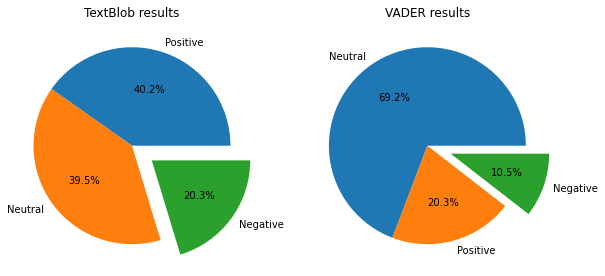

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

  

In [26]:
vad.head()

,translated_english_content,neg,neu,pos,compound,Cleaned_Content,POS tagged,Lemma
0,@Kuechentyrann Your eggs have good nutriscore.,0.00,0.633,0.367,0.4404,Kuechentyrann Your eggs have good nutriscore,"[(Kuechentyrann, n), (eggs, n), (good, a), (nu...",Kuechentyrann egg good nutriscore
1,@Teddymonster10 they have a good nutriscore,0.00,0.580,0.420,0.4404,Teddymonster they have a good nutriscore,"[(Teddymonster, n), (good, a), (nutriscore, n)]",Teddymonster good nutriscore
2,@Vrechts @IVanVanDecloot that Ecoscore and Nut...,0.00,1.000,0.000,0.0000,Vrechts IVanVanDecloot that Ecoscore and Nutr...,"[(Vrechts, n), (IVanVanDecloot, n), (Ecoscore,...",Vrechts IVanVanDecloot Ecoscore Nutriscore f...
3,"@matteosalvinimi then, the offices had prepare...",0.00,0.924,0.076,0.4497,matteosalvinimi then the offices had prepared...,"[(matteosalvinimi, n), (offices, n), (prepared...",matteosalvinimi office prepare dossier Pnnr ...
4,"No, but wait there, they put the Nutriscore on...",0.11,0.890,0.000,-0.1531,No but wait there they put the Nutriscore on b...,"[(wait, v), (put, v), (Nutriscore, n), (bottle...",wait put Nutriscore bottle water http co eq ...


In [27]:
df2 = df.copy()

<b>Visualization With Respect To Countries</b>

In [28]:
countries = []
for data in tqdm.tqdm(df2['content']):
    try:
        lang = detect(data)
        country = pycountry.countries.get(alpha_2=lang).name
        countries.append(country)
        
    except:
        countries.append('other')
        continue
    

100%|███████████████████████████████████████████████████████████████████████████| 32178/32178 [04:00<00:00, 133.70it/s]


In [32]:
vad['countries'] = countries[:vad.shape[0]]
    
vad.head()

,translated_english_content,neg,neu,pos,compound,Cleaned_Content,POS tagged,Lemma,countries
0,@Kuechentyrann Your eggs have good nutriscore.,0.00,0.633,0.367,0.4404,Kuechentyrann Your eggs have good nutriscore,"[(Kuechentyrann, n), (eggs, n), (good, a), (nu...",Kuechentyrann egg good nutriscore,Germany
1,@Teddymonster10 they have a good nutriscore,0.00,0.580,0.420,0.4404,Teddymonster they have a good nutriscore,"[(Teddymonster, n), (good, a), (nutriscore, n)]",Teddymonster good nutriscore,Germany
2,@Vrechts @IVanVanDecloot that Ecoscore and Nut...,0.00,1.000,0.000,0.0000,Vrechts IVanVanDecloot that Ecoscore and Nutr...,"[(Vrechts, n), (IVanVanDecloot, n), (Ecoscore,...",Vrechts IVanVanDecloot Ecoscore Nutriscore f...,Netherlands
3,"@matteosalvinimi then, the offices had prepare...",0.00,0.924,0.076,0.4497,matteosalvinimi then the offices had prepared...,"[(matteosalvinimi, n), (offices, n), (prepared...",matteosalvinimi office prepare dossier Pnnr ...,Italy
4,"No, but wait there, they put the Nutriscore on...",0.11,0.890,0.000,-0.1531,No but wait there they put the Nutriscore on b...,"[(wait, v), (put, v), (Nutriscore, n), (bottle...",wait put Nutriscore bottle water http co eq ...,France


In [42]:
vad['countries'].value_counts()

Spain                   8920
France                  8283
Italy                   3990
other                   3023
Germany                 2219
Netherlands             1170
Portugal                 291
Canada                   188
Romania                  156
Poland                    77
Finland                   19
Afghanistan               18
El Salvador               12
Croatia                   11
Sierra Leone              11
Turkey                     7
Ethiopia                   7
Indonesia                  4
Virgin Islands, U.S.       4
Norway                     3
Slovakia                   2
Timor-Leste                2
Lithuania                  2
Latvia                     2
Somalia                    2
Hungary                    1
Argentina                  1
Russian Federation         1
Cyprus                     1
Name: countries, dtype: int64

In [40]:
# top 15 populated countries
country_df = vad['countries'].value_counts()[:15]

In [49]:
top_countries = country_df.to_dict() 
top_countries.keys()

dict_keys(['Spain', 'France', 'Italy', 'other', 'Germany', 'Netherlands', 'Portugal', 'Canada', 'Romania', 'Poland', 'Finland', 'Afghanistan', 'El Salvador', 'Croatia', 'Sierra Leone'])

In [53]:
top_countries_list = []
sentiment_scores = []

In [54]:
for index, row in vad.iterrows():
    if row['countries'] in top_countries.keys():
        top_countries_list.append(row['countries'])
        sentiment_scores.append(row['compound'])

In [56]:
top_countries_data = pd.DataFrame()

In [57]:
top_countries_data['country'] = top_countries_list
top_countries_data['sentiment'] = sentiment_scores

In [58]:
top_countries_data.head()

,country,sentiment
0,Germany,0.4404
1,Germany,0.4404
2,Netherlands,0.0000
3,Italy,0.4497
4,France,-0.1531


<AxesSubplot:xlabel='country', ylabel='count'>

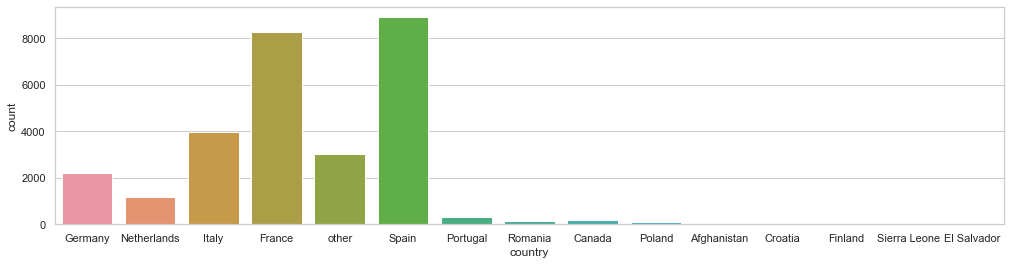

In [62]:
dim = (17, 4)
fig, ax = plt.subplots(figsize=dim)
sns.countplot(data=top_countries_data, x='country')

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

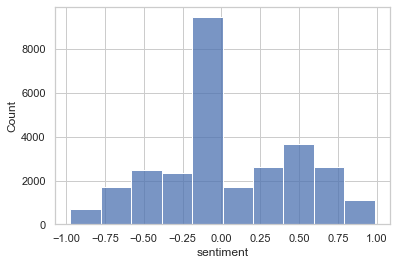

In [66]:
sns.histplot(top_countries_data["sentiment"],bins=10)

<b>Among the top countries there are positive sentiments mostly for nutriscore/nutri-score</b>

<AxesSubplot:xlabel='country', ylabel='sentiment'>

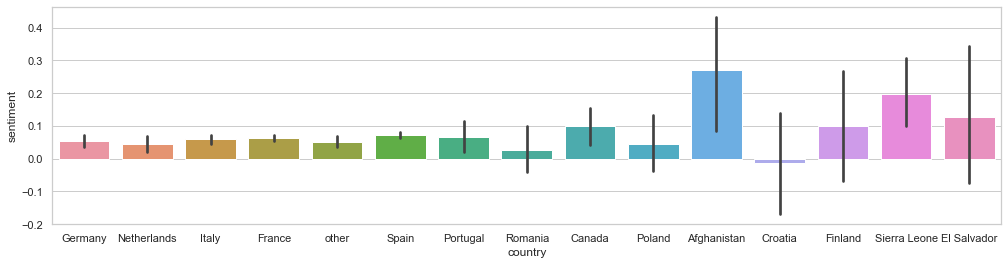

In [70]:
dim = (17, 4)
fig, ax = plt.subplots(figsize=dim)
sns.barplot(x='country', y='sentiment', data=top_countries_data)